<h1> <center> Linear Regression Model for Predicting House Prices  </h1> <center>
    <h2> Using Turi Create </h2>
    
Source: [ML Foundationsx, Washington University-Coursera](https://www.coursera.org/learn/ml-foundations/supplement/RP8te/predicting-house-prices-assignment)

In [5]:
import turicreate
import matplotlib.pyplot as plt
%matplotlib inline

### <center>Load house sales data <center>

In [6]:
sales = turicreate.SFrame('./data/home_data.sframe/')

In [7]:
sales.head(5)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,7.0,1180.0,0.0,1955.0,0.0,98178,47.51123398
0,3,7.0,2170.0,400.0,1951.0,1991.0,98125,47.72102274
0,3,6.0,770.0,0.0,1933.0,0.0,98028,47.73792661
0,5,7.0,1050.0,910.0,1965.0,0.0,98136,47.52082


## <center> Explore data set <center>

In [8]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [8]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [17]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

__Zip code with the largest average price__

In [65]:
sales[sales['zipcode']=='98039']['price'].mean()

2160606.6000000006

__Total number of data points__

In [67]:
sales.num_rows()

21613

__Ratio of houses with area between 2000 and 4000 square feet__

In [66]:
sales[(sales['sqft_living']>2000) & (sales['sqft_living']<4000) ].num_rows()

9111

In [68]:
sales[(sales['sqft_living']>2000) & (sales['sqft_living']<4000) ].num_rows()/sales.num_rows()

0.4215518437977143


# 
## <center> Simple regression model that predicts price from 1 feature <center>

In [10]:
training_set, test_set = sales.random_split(.8,seed=0)

### <center> train simple regression model<center>

In [11]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'], validation_set=None )

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.014929     | 4349521.926170     | 262943.613754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

### <center> Evaluate the quality of the model <center>

In [12]:
print (test_set['price'].mean())

543054.042563254


In [13]:
print (sqft_model.evaluate(test_set))

{'max_error': 4152321.5154324532, 'rmse': 255172.36081132572}


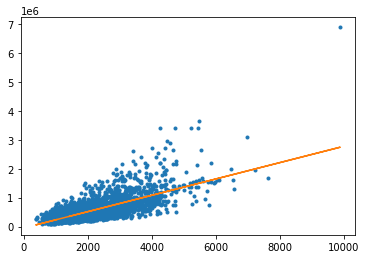

In [30]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

In [13]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47114.02067021548,4923.34437752626
sqft_living,None,281.95785016598734,2.1640546532334786


# 
<h2> <center> Regression Model that predicts price from 6 features </h2> <center>

In [19]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
#sales[my_features].show()

In [20]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.050107     | 4086543.315840     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

# 
<h2> <center> Regression Model that predicts price from 18 features </h2> <center>

In [21]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]


In [22]:
advanced_features_model = turicreate.linear_regression.create(training_set,target='price', features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.011507     | 4336058.938762     | 162392.982702                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

# 
<h2> <center>Compare simple model with more complex ones </h2> <center>

In [23]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))
print (advanced_features_model.evaluate(test_set))

{'max_error': 4143550.8825286007, 'rmse': 255191.02870527367}
{'max_error': 3152242.7848689524, 'rmse': 180439.07296640746}
{'max_error': 3170363.181384689, 'rmse': 155269.65792803015}


In [24]:
 (my_features_model.evaluate(test_set)['rmse'] - advanced_features_model.evaluate(test_set)['rmse'])

25169.41503837731

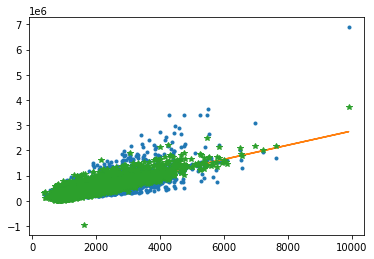

In [33]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-',
        test_set['sqft_living'],my_features_model.predict(test_set),'*')

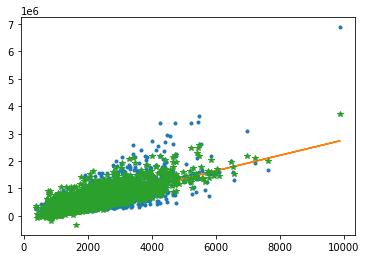

In [34]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-',
        test_set['sqft_living'],advanced_features_model.predict(test_set),'*')

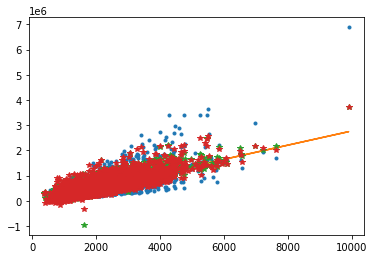

In [35]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-',
        test_set['sqft_living'],my_features_model.predict(test_set),'*',
        test_set['sqft_living'],advanced_features_model.predict(test_set),'*')

# Apply learned models to make predictions

In [24]:
house1 = sales[sales['id']=='5309101200']

In [25]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [20]:
print (house1['price'])

[620000, ... ]


In [22]:
print (sqft_model.predict(house1))

[629976.0401234042]


In [23]:
print (my_features_model.predict(house1))

[724495.9972504767]


## Prediction for a second house, a fancier one

In [24]:
house2 = sales[sales['id']=='1925069082']

In [25]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
print (sqft_model.predict(house2))

[1263438.8662907984]


In [27]:
print (my_features_model.predict(house2))

[1442070.3235753486]


## Prediction for a super fancy home

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [29]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[13491984.465966508]
